# plot ICs of the idealized tracers

In [1]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));

In [2]:
[grid, ~, ~] = read_grid_MOM([workdir '/MOM6_exp/swm_spunup/']); 
IC_fnm = [workdir '/MOM6_exp/swm_spunup/res_for_onltr/MOM.res.nc'];
ds_IC = ncstruct(IC_fnm);

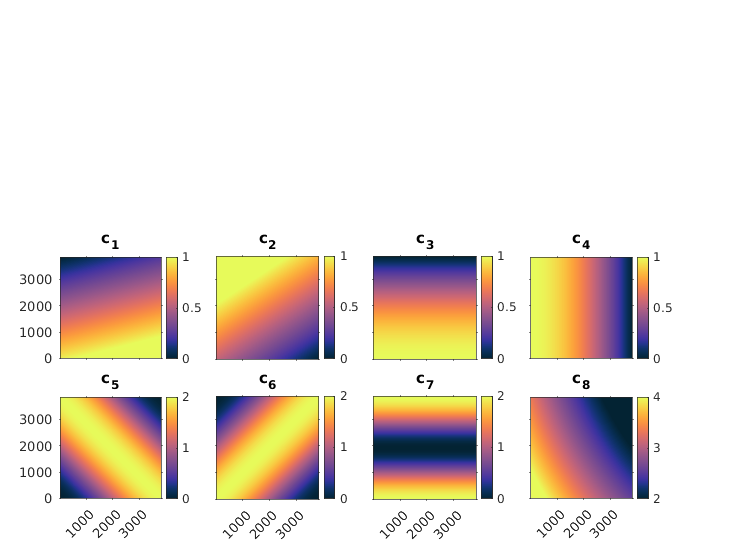

In [3]:
[x, y] = deal(grid.lonh, grid.lath);
cmap = 'thermal';


x_top = 0.08; y_top = 0.1; h = 0.2; w = h; dx = 0.01; dy = 0.05;
pos_top = {[x_top y_top+h+dy w h], [x_top+w+dx y_top+h+dy w h], [x_top+2*w+2*dx y_top+h+dy w h], [x_top+3*w+3*dx y_top+h+dy w h] ,...
    [x_top y_top w h], [x_top+w+dx y_top w h], [x_top+2*w+2*dx y_top w h], [x_top+3*w+3*dx y_top w h]};

figure
% [ha, ~] = tight_subplot(2,4,[.05 .01],[.02 .02],[.1 .05]);
for ic = 1:8
    % axes(ha(ic));
    subplot('Position',pos_top{ic});

    fnm = ['tr' num2str(ic)];
    
    f_do = ds_IC.(fnm)(:,:,1); 
    imagescn(x, y, f_do'); set(gca,'tickdir','out','xtick',[1e3:1e3:3e3]);
    if ~(ic == 1 || ic == 5); set(gca,'yticklabel',''); end
    if ic <= 4; set(gca,'xticklabel',''); end
    cmocean(cmap); axis square

    cb = colorbar;
    % cb.Location = 'southoutside';
    cb.Location = 'eastoutside';

    if ic <= 4
        caxis([0 1]);
    elseif (ic > 4 && ic < 8)
        caxis([0 2]);
    else
        caxis([2 4]);
    end
    title(['c_' num2str(ic)])

end

% ---
set(gcf,'PaperPositionMode','auto'); 
fignm = [homedir '/work_MOM/figures/fig_appxB_IC_idl'];
% exportgraphics(gcf,[fignm '.pdf'], 'BackgroundColor','white','ContentType','vector')
